In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
# Reading Data.
mkt_data = pd.read_csv(r'C:\Users\mannu\Desktop\bank.csv')

In [3]:
# First 5 rows of data.
mkt_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Description of quantitative columns of dataset.
mkt_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Data explanation:
### This data is related to a bank's marketing campaigns and has been sourced through kaggle.
## Quantitative Columns:
#### Age- Age of the customer
#### Balance -  balance of the customer on the day they were contacted.
#### Day - Date value
#### Month - Date value
#### Duration -  Duration of the call
#### Campaing - In which Campaign this outcome was reached.
#### pdays - Number of days since the customer was contacted
#### previous - Number of days since customer contact was successful.
## Qualitative Columns:
#### Job -  Job Type of the customer
#### Marital - Marital Status of the customer
#### Education - Education Type of the customer
#### Default - is the customer a credit defaulter?
#### Housing - If the customer is a housing loan
#### loan - whether the customer has a loan other than housing loan
#### Contact - Mode of contact
#### Month - Month in which customer was contacted
#### deposit - whether the customer had money in there account
#### Poutcome -  This is our main result value, here success  means that customer accepted the offer and will perform call-to-action, failure means customer declined the offer, unknown means customer hasn't yet been informed of the offer, other means customer was neutral.

## Data Cleaning

#### Since there are negative values in deposit, it is an error since customer can not have negative balance. We will change them to true values.

In [5]:
# Using lambda function to mutate values in data
mkt_data['balance'] = mkt_data.balance.apply(lambda x : x * -1 if (x < 0) else x)

In [6]:
mkt_data[mkt_data['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [7]:
# describing data again to get a better picture after cleaning balance column
mkt_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1568.455922,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3206.190276,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,171.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,568.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1713.750000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
# Checking for null values.

mkt_data.isnull().sum().sum()

0

### There are no null values 

In [9]:
# Creating lists of qualitative and quantitative columns
qual_cols = []
quant_cols = []
all_cols = mkt_data.columns
mkt_data['age'].dtype

dtype('int64')

In [10]:
for columns in all_cols:
    if mkt_data[columns].dtype == 'int64':
        quant_cols.append(columns)
    else:
        qual_cols.append(columns)

In [11]:
qual_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [12]:
quant_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

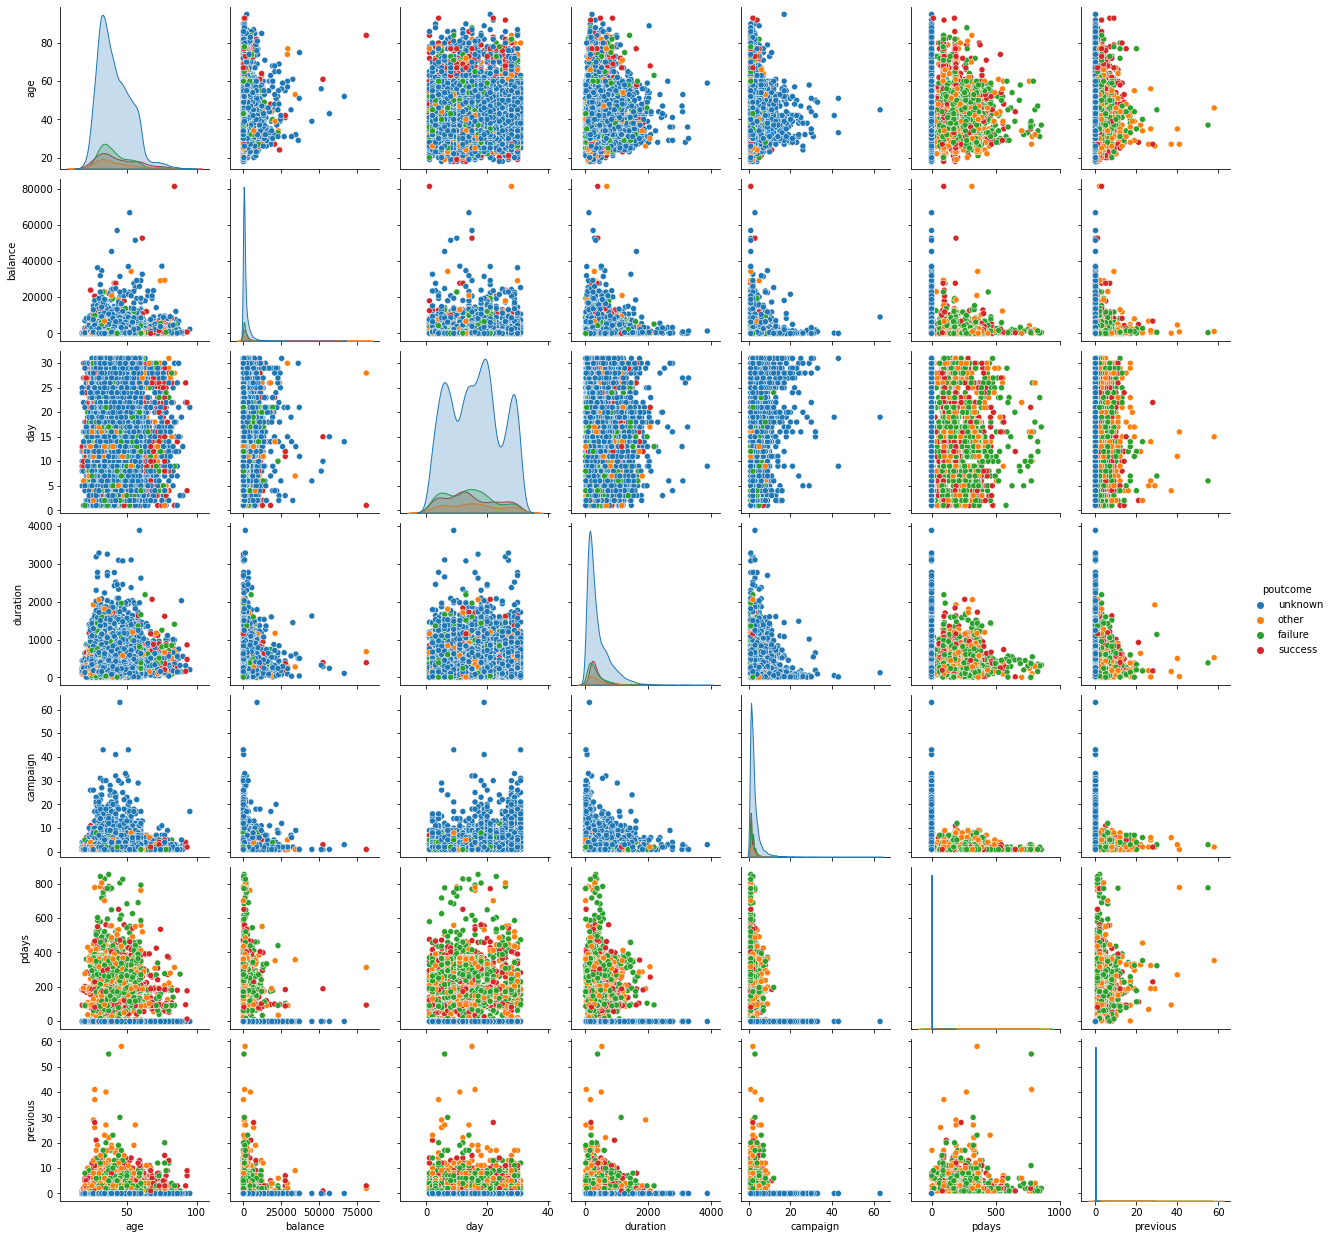

In [13]:
sns.pairplot(mkt_data,hue = 'poutcome')

### Some resemblence of clustering can be seen but only in relation to duration, which we only get to know after a person has been called and an outcome has been reached.

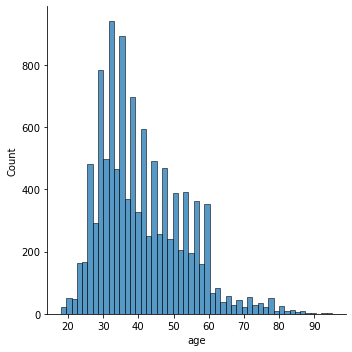

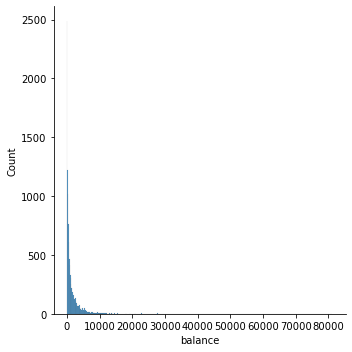

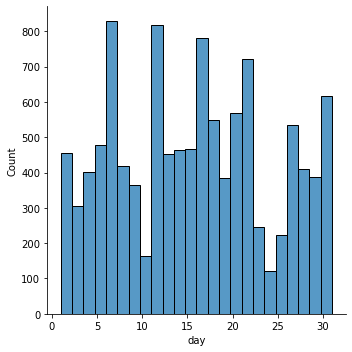

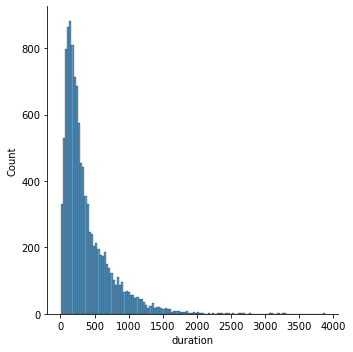

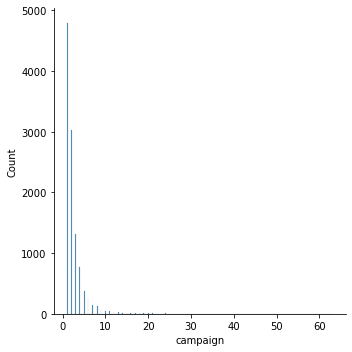

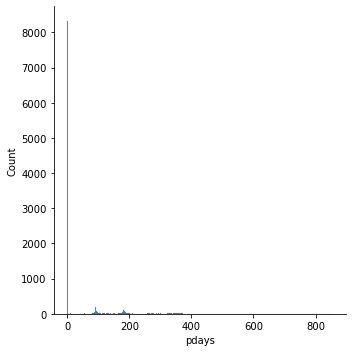

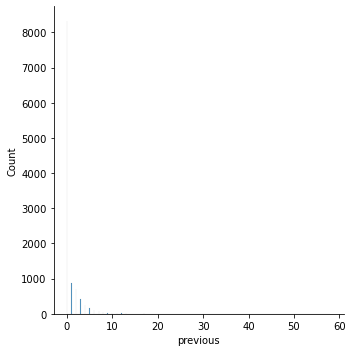

In [14]:
# Checking distributions of quanttative data:
for i in quant_cols:
    sns.displot(x = i, data = mkt_data)

### This campaign is targeted towards people with ages between 30 and 40

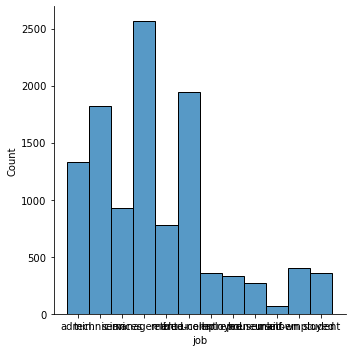

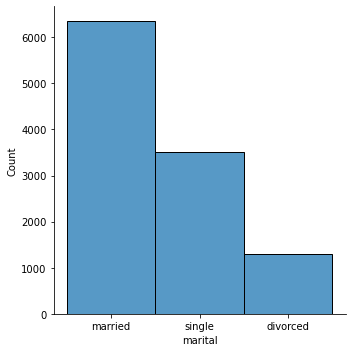

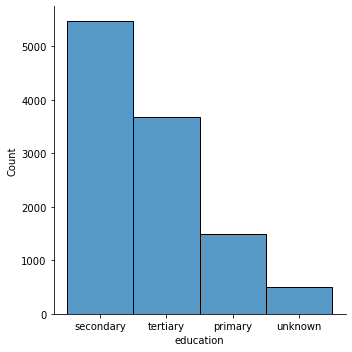

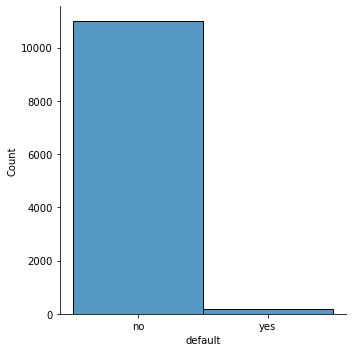

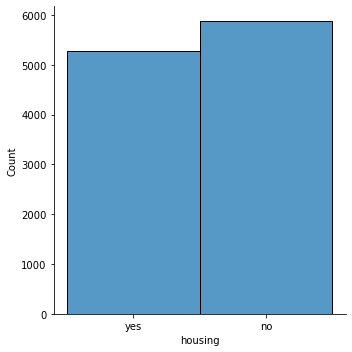

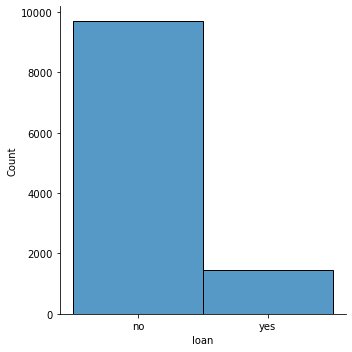

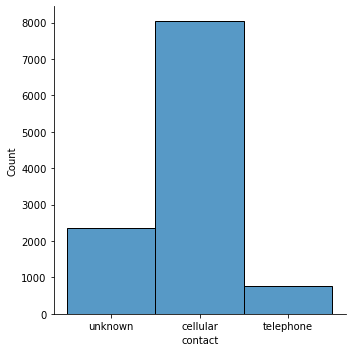

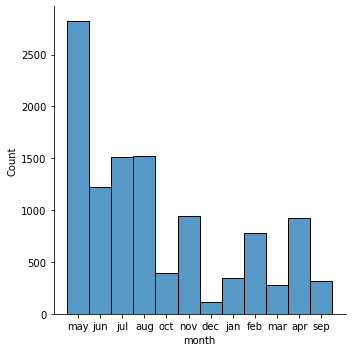

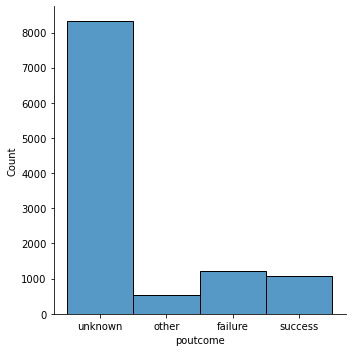

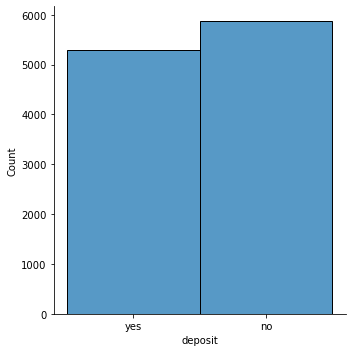

In [15]:
# Checking distribution of Job Types:
for i in qual_cols:
    sns.displot(x = i , data = mkt_data)

<BarContainer object of 12 artists>

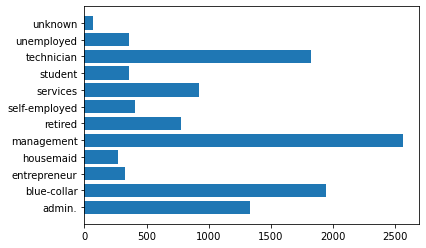

In [16]:
# Contact frequency per job type.
plt.barh(mkt_data.groupby('job').count().reset_index()['job'],mkt_data.groupby('job').count().reset_index()['deposit'] )

## Obersvations:
### People who had management jobs were contacted a lot, and housemaids,students, unemployed and self-employed people were contacted very less.

## Further Methodology:

#### Since there are unknown values in Poutcome column, these unknown values are prospective customers who can effect our conversion rate. I will create a seperate dataset where only known poutcomes are present, i.e. "success" and "failure". Using this data I will try to find customer patterns based on there markers which can then be applied to priorotize in contacting prospective customers.

In [77]:
known_mkt_data = mkt_data[mkt_data['poutcome'].isin(['success','failure'])]

In [18]:
known_mkt_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
891,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
933,34,admin.,married,tertiary,no,899,yes,no,unknown,12,nov,114,1,170,3,failure,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
952,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,1210,2,171,4,failure,yes


In [19]:
known_mkt_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,42.143976,1762.541975,14.250109,342.875163,1.819487,202.147020,3.068726
std,13.087729,3348.511537,8.160199,273.166951,1.219241,120.881705,2.929632
min,18.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000
25%,32.500000,249.500000,8.000000,164.500000,1.000000,97.000000,1.000000
50%,39.000000,723.000000,13.000000,263.000000,1.000000,182.000000,2.000000
75%,50.000000,2065.000000,20.000000,433.000000,2.000000,277.000000,4.000000
max,93.000000,81204.000000,31.000000,2184.000000,12.000000,854.000000,55.000000


### This approach will work since we have 2299 customers who have decisively accepted or declined our offer. With this population size we can have a confidence interval of 99% with a margin of error of 2.5 % for our entire customer set

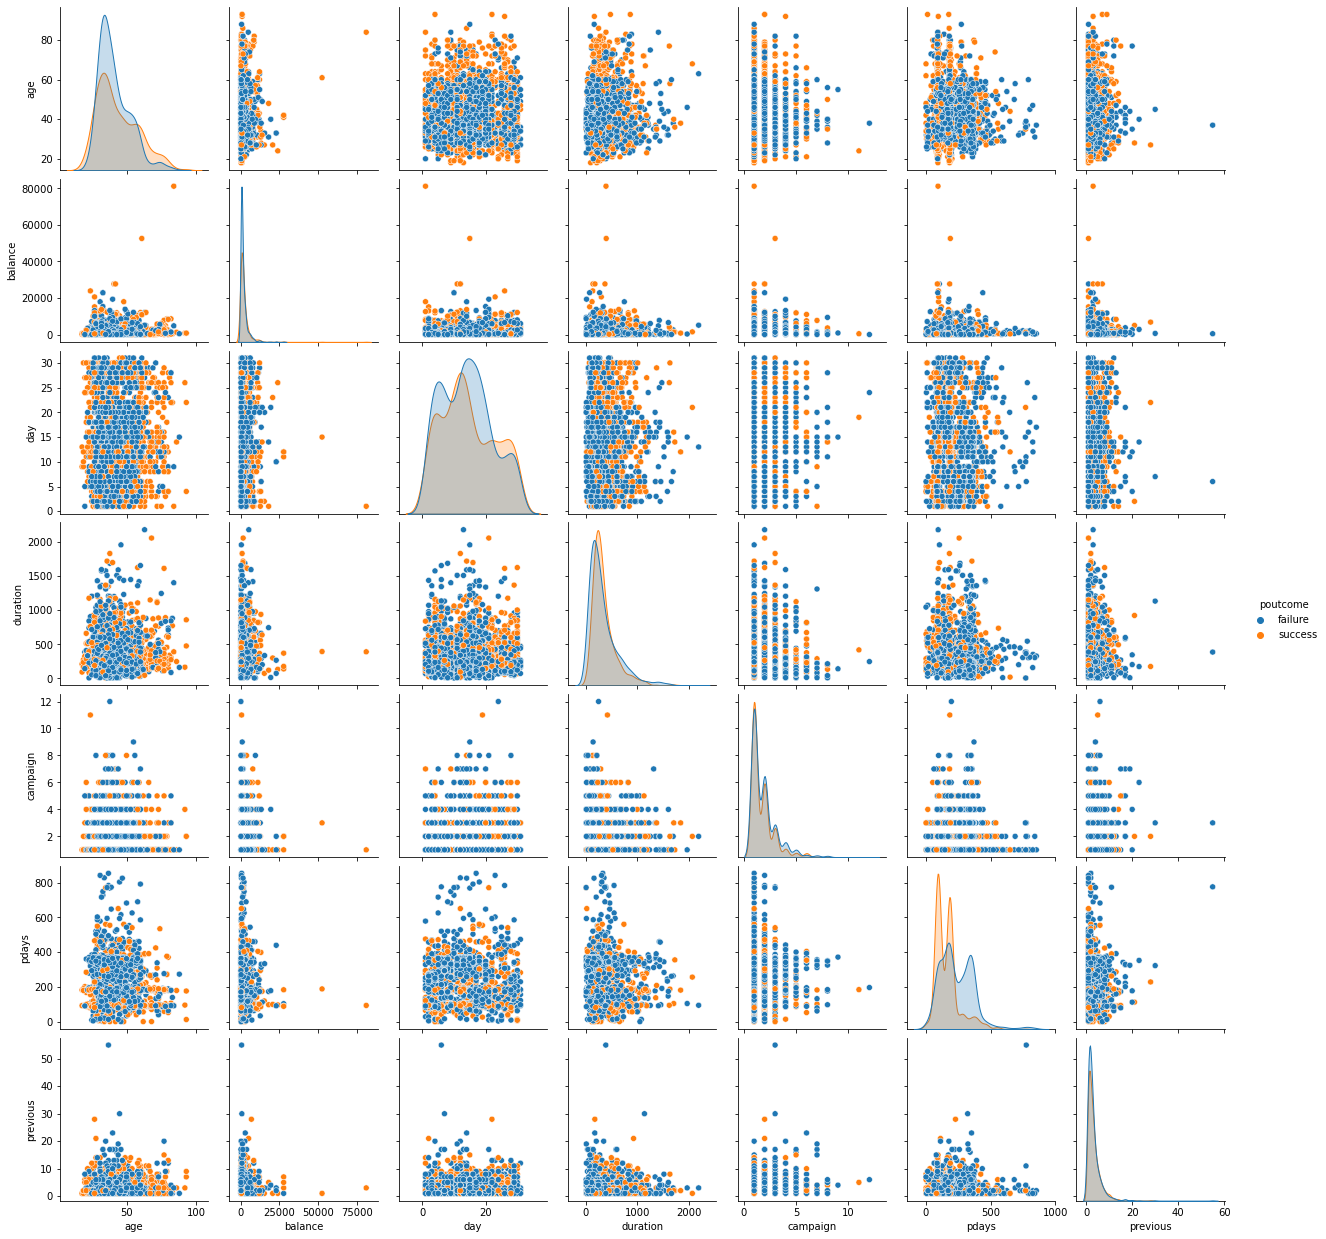

In [20]:
sns.pairplot(known_mkt_data, hue = 'poutcome')

### No signs of clustering found.

In [21]:
known_mkt_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
891,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
933,34,admin.,married,tertiary,no,899,yes,no,unknown,12,nov,114,1,170,3,failure,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
952,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,1210,2,171,4,failure,yes


<BarContainer object of 12 artists>

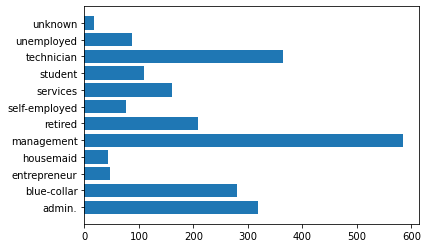

In [22]:
plt.barh(known_mkt_data.groupby('job').count().reset_index()['job'],known_mkt_data.groupby('job').count().reset_index()['poutcome'])

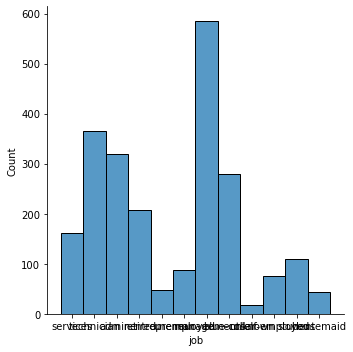

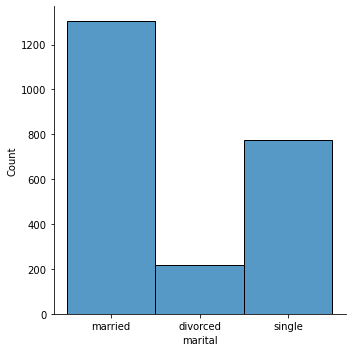

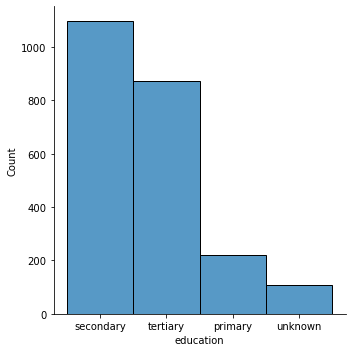

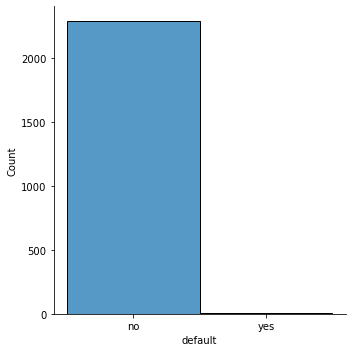

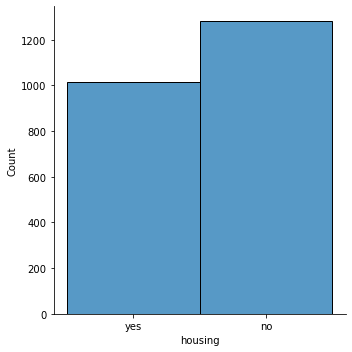

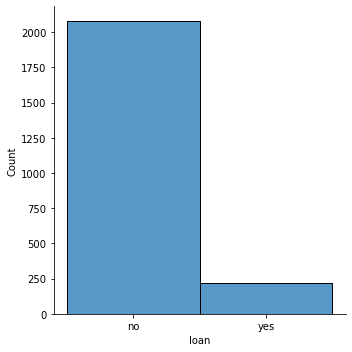

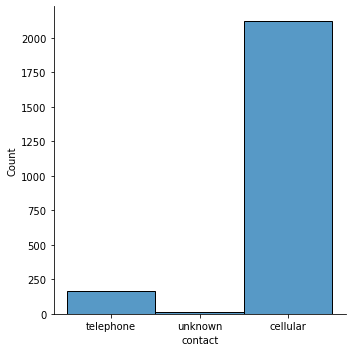

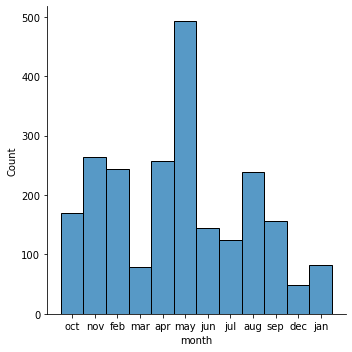

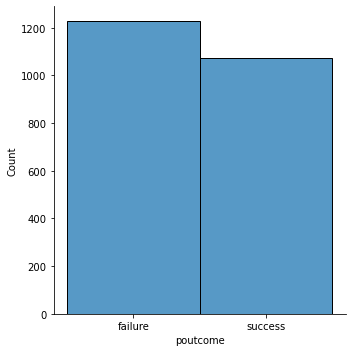

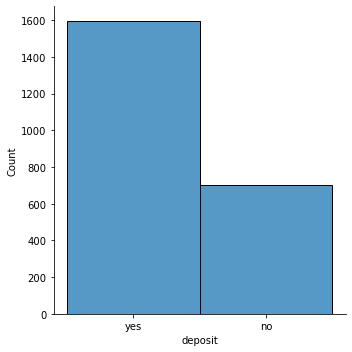

In [23]:
for col in qual_cols:
    sns.displot(known_mkt_data[col])

<AxesSubplot:xlabel='job', ylabel='count'>

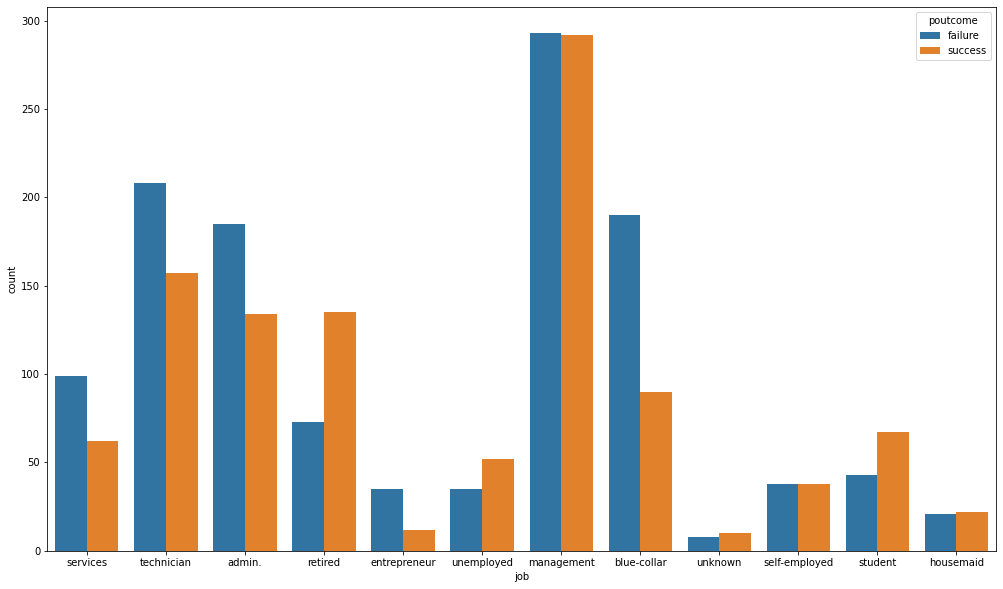

In [24]:
plt.figure(figsize = (17,10))
sns.countplot(x= 'job', data= known_mkt_data, hue = 'poutcome')

<AxesSubplot:xlabel='housing', ylabel='count'>

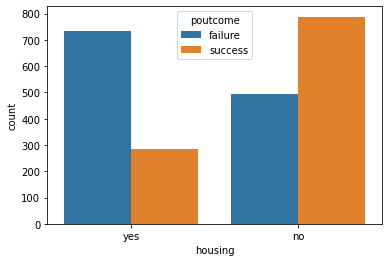

In [25]:
sns.countplot(x= 'housing', hue= 'poutcome', data= known_mkt_data)

<AxesSubplot:xlabel='loan', ylabel='count'>

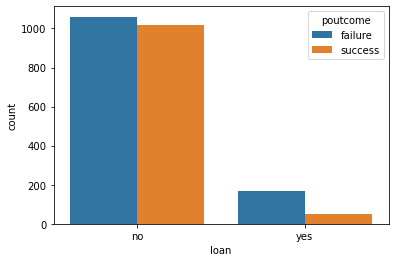

In [26]:
sns.countplot(x= 'loan', hue='poutcome', data= known_mkt_data)

<AxesSubplot:xlabel='month', ylabel='count'>

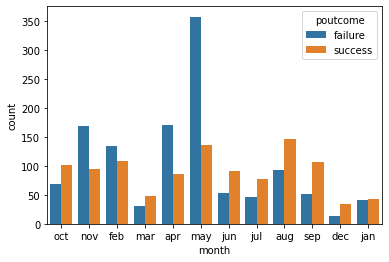

In [27]:
sns.countplot(x= 'month', hue= 'poutcome', data= known_mkt_data)

<AxesSubplot:xlabel='month', ylabel='count'>

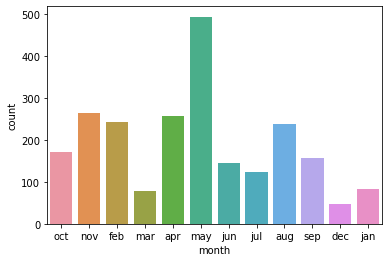

In [28]:
sns.countplot(x= 'month', data =known_mkt_data)

<AxesSubplot:xlabel='marital', ylabel='count'>

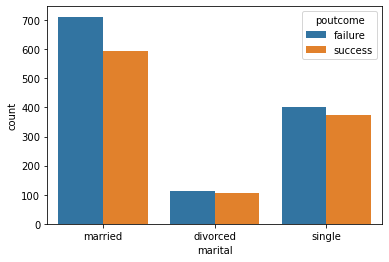

In [29]:
sns.countplot(x= 'marital', hue= 'poutcome', data= known_mkt_data)

In [30]:
# finding overall conversion rate
sum(known_mkt_data['poutcome'] == 'success')/len(known_mkt_data) * 100

46.58547194432362

### Our overall conversion rate is 46.58%

## Interesting facts found so far:
### JOB TYPE:
#### Students, Retired people, and unemployed people are least contacted but most profitable, i.e. are improving the conversion rate.
#### On the other hadn while management,blue-collar, admin, and technician are most contacted but are either not effecting the conversion rate(management) or inversly affecting it for example blue-collar are the least profitable.

### Housiong Loan:
#### People who don't have a housing loan are accepting the offfer much more than people who have a housing loan.

### Loan and Marital Status: 
#### Loan and Marital Status does not have anything intereseting or something that stands out. Leads and conversions are standard.

### Month:
#### Although may is the month in which most of the contacts were made August, September, October, December, and March are the months in which most leads converted.



# --------------------------------------------------------------------------------------------------
# Now I will further analyze why is it that certain job types are accepting the offer more than other Job Types.

In [31]:
# I will create two datasets a high performing job type which is "Retired" and a low performing job type which is "Blue-Collar"

In [32]:
blue_collar = known_mkt_data[known_mkt_data['job'] == 'blue-collar']

In [33]:
retired = known_mkt_data[known_mkt_data['job'] == 'retired']

In [34]:
blue_collar.describe()

,age,balance,day,duration,campaign,pdays,previous
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,39.189286,1248.450000,13.853571,340.346429,1.896429,230.567857,3.035714
std,9.008751,2011.298296,7.128869,275.700914,1.267171,117.499679,3.043085
min,21.000000,0.000000,1.000000,6.000000,1.000000,14.000000,1.000000
25%,32.000000,204.000000,8.750000,157.500000,1.000000,132.750000,1.000000
50%,38.000000,535.000000,13.000000,262.500000,1.000000,191.000000,2.000000
75%,46.000000,1568.000000,18.000000,434.250000,2.000000,340.000000,3.250000
max,63.000000,15341.000000,31.000000,1691.000000,8.000000,828.000000,23.000000


In [35]:
retired.describe()

,age,balance,day,duration,campaign,pdays,previous
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,67.995192,2587.802885,14.956731,405.697115,1.605769,169.740385,3.139423
std,8.694769,5957.352715,7.547150,281.975261,0.957233,98.002563,2.737251
min,47.000000,0.000000,1.000000,31.000000,1.000000,1.000000,1.000000
25%,61.000000,523.000000,10.000000,219.500000,1.000000,92.000000,1.000000
50%,68.000000,1495.000000,14.000000,317.500000,1.000000,181.000000,2.000000
75%,75.000000,2827.500000,21.000000,512.750000,2.000000,187.000000,4.000000
max,93.000000,81204.000000,30.000000,2062.000000,6.000000,792.000000,20.000000


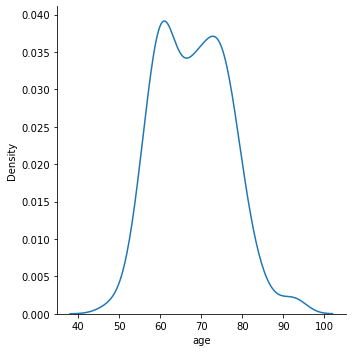

In [36]:
sns.displot(x = 'age', data= retired, kind='kde')

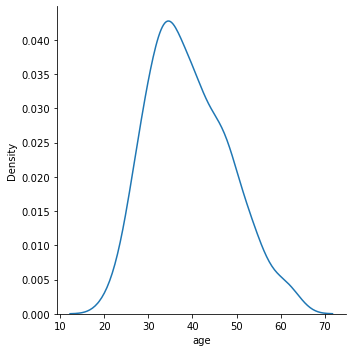

In [37]:
sns.displot(x = 'age',data= blue_collar,kind= 'kde')

In [38]:
retired.groupby('housing').count()['poutcome']

housing
no     184
yes     24
Name: poutcome, dtype: int64

In [39]:
blue_collar.groupby('housing').count()['poutcome']

housing
no      83
yes    197
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

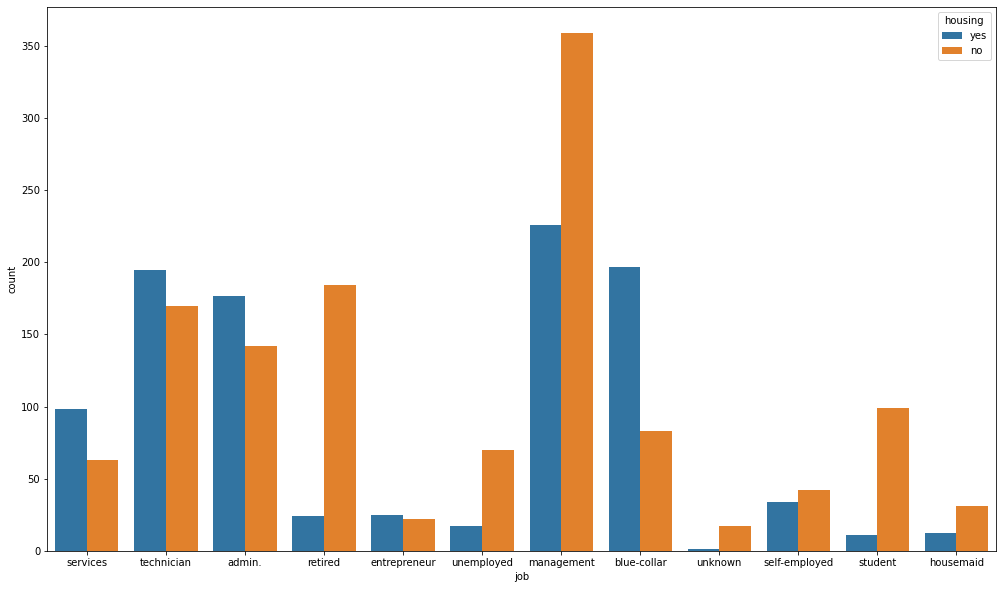

In [40]:
plt.figure(figsize = (17,10))
sns.countplot(x= 'job', hue= 'housing', data= known_mkt_data)

### It's found that job types that are more likely to not have a home-loan are also high contributors to lead conversion. for example retired people, and students. i.e job type has nothing to do with lead conversion it is the underlying home-loan condition.

# ____________________________________________________________________

# Further exploring why home-loan is affecting lead conversion 

# ______________________________________________

In [41]:
# creating two databases again to find an underlying cause if any


In [42]:
hloan_no = known_mkt_data[known_mkt_data['housing'] == 'no']
hloan_yes = known_mkt_data[known_mkt_data['housing'] == 'yes']

In [43]:
hloan_no.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,44.031201,1990.060062,14.940718,336.796412,1.784711,171.574103,2.964899
std,15.242734,3909.453126,8.573487,248.186232,1.211634,110.565544,2.548119
min,18.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000
25%,32.000000,294.500000,8.000000,181.250000,1.000000,93.000000,1.000000
50%,40.000000,882.000000,14.000000,269.000000,1.000000,170.000000,2.000000
75%,55.000000,2331.000000,22.000000,407.000000,2.000000,188.000000,4.000000
max,93.000000,81204.000000,31.000000,2184.000000,12.000000,792.000000,28.000000


In [44]:
hloan_yes.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,39.764995,1475.739430,13.379548,350.537856,1.863324,240.686332,3.199607
std,9.182684,2437.768459,7.521589,301.676906,1.227956,122.356114,3.345946
min,21.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,33.000000,202.000000,7.000000,142.000000,1.000000,161.000000,1.000000
50%,38.000000,608.000000,13.000000,256.000000,1.000000,230.000000,2.000000
75%,45.000000,1682.000000,18.000000,475.000000,2.000000,342.000000,4.000000
max,78.000000,22867.000000,31.000000,1962.000000,9.000000,854.000000,55.000000


## There is an average balance difference between people who have a homeloan, average balance of all the people who do not have a homeloan is higher than that of people who have a home loan. This data however; does not have the means to relate a causation or correlation, my hypothesis is that this is probably because of interest and repayment.

## Deposit: 

<AxesSubplot:xlabel='deposit', ylabel='count'>

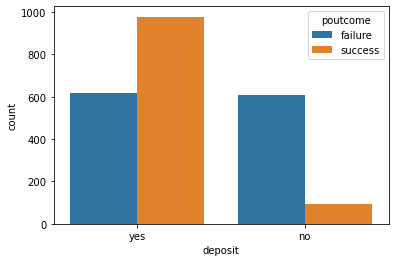

In [45]:
sns.countplot(x= 'deposit', data= known_mkt_data, hue='poutcome')

### Deposit and Outcome seem to be connected but there is a very high chance this is because that deposit is mostly, in this scenario, caused by the outcome. Tha tis to say that customers deposited money due because they accepted recurring deposit offer.

## Hypothesis:
#### My null hypothesis is that contrary to early beliefs during this analysis job type has no correlation to outcome.
#### Whereas Home-loan is a high predictor.

# Now we will run Logistic regression to gain insights and prove hypotheses.

In [88]:
# preparing data for Logistic Regressionknown_mkt_data
reg_data = mkt_data[mkt_data['poutcome'].isin (['success','failure'])]

In [89]:
reg_data['housing'].replace(('yes','no'),(1,0), inplace= True)

In [90]:
reg_data['poutcome'].unique()

array(['failure', 'success'], dtype=object)

In [91]:
reg_data['loan'].replace(('yes','no'),(1,0), inplace= True)
reg_data['poutcome'].replace(('success','failure'),(1,0), inplace= True)

## I am leaving out both duration and deposit columns from logistic regression since they are both caused by poutcome. Also leaving out month and day since they are time serie data.

In [49]:
# Turning categorical data into numbers

In [92]:
dummies = pd.get_dummies(reg_data[['job','education', 'marital']], prefix=['job','education','marital'])

In [94]:
reg_data.drop(['job','education','marital','default','contact','day','month','duration','deposit'], axis=1, inplace= True)

C:\Users\mannu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
reg_data = pd.concat([reg_data,dummies], axis=1)

In [97]:
reg_data

,age,balance,housing,loan,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
891,33,3444,1,0,1,91,4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
899,56,589,1,0,1,147,2,1,0,0,...,1,0,0,0,1,0,0,0,1,0
933,34,899,1,0,1,170,3,0,1,0,...,0,0,0,0,0,1,0,0,1,0
951,53,2269,0,0,2,150,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
952,37,5115,1,0,2,171,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098,46,21,1,0,1,338,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
11133,37,1594,1,0,1,260,5,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11145,60,134,0,0,1,271,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
11155,35,80,1,1,2,172,2,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [98]:
X = reg_data.drop('poutcome', axis= 1)

In [99]:
y= reg_data['poutcome']

In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [131]:
logreg = LogisticRegression(solver= 'liblinear')

In [132]:
rfe = RFE(logreg, n_features_to_select=20)

In [133]:
rfe = rfe.fit(X, y)

In [134]:
print(rfe.support_)

[False False  True  True  True False  True False  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True]


In [135]:
print(rfe.ranking_)

[3 7 1 1 1 6 1 2 1 1 1 1 1 1 4 1 5 1 1 1 1 1 1 1 1 1]


In [137]:
X.columns

Index(['age', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')

In [123]:
from sklearn.linear_model import LogisticRegression

In [138]:
logreg = LogisticRegression(solver = 'liblinear')

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [141]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [142]:
y_pred = logreg.predict(X_test)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       369
           1       0.68      0.71      0.69       321

    accuracy                           0.71       690
   macro avg       0.71      0.71      0.71       690
weighted avg       0.71      0.71      0.71       690



In [146]:
print(confusion_matrix(y_test,y_pred))

[[262 107]
 [ 94 227]]


In [148]:
import statsmodels.api as sm
log_model = sm.Logit(y_test, X_test)
result= log_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.557458
         Iterations 6
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.193     
Dependent Variable:        poutcome               AIC:                    817.2915  
Date:                      2022-05-16 21:03       BIC:                    926.1721  
No. Observations:          690                    Log-Likelihood:         -384.65   
Df Model:                  23                     LL-Null:                -476.60   
Df Residuals:              666                    LLR p-value:            4.5552e-27
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            6.0000                                                   
------------------------------------------------------------------------------------
                     Coef.    Std.Err.      z    P>|z|      [0.025         0.975]  

## As hypothesized, there is nothing else that is related to outcome of the campaign more than housing-loan.
#### One of the main insights that comes out of this analysis is that we should offer a product that is useful for both sets of people who have a house-loan and who don't or rather than house-loan we should say a long term loan commitment

# Please understand that this model has an accuracy of 71 %, and a F1 of 74% which means this model will predict correct outcome 71% of the time, and identify the correct outcome 74% of the time.